In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as data


In [ ]:
start=dt.datetime(2010,1,1)
end=dt.datetime(2019,12,31)
symbol = 'RELIANCE.NS'
df = yf.download(tickers=symbol, start=start, end=end)
df.head()



[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04  540.427307  540.427307  506.127411  532.700500  482.812378   
2010-01-05  569.551208  569.551208  527.697937  530.323059  480.657654   
2010-01-06  534.879883  542.111328  530.298279  538.891846  488.423950   
2010-01-07  538.891846  552.265076  533.938782  547.832092  496.526886   
2010-01-08  548.797974  551.670715  542.854309  546.395691  495.225098   

              Volume  
Date                  
2010-01-04  35372156  
2010-01-05   9872785  
2010-01-06  10933743  
2010-01-07  12090336  
2010-01-08   6973331

In [ ]:
df.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-12-23  1545.450684  1562.736816  1543.172241  1556.644531  1541.208374   
2019-12-24  1554.168091  1557.288452  1528.015991  1531.928833  1516.737793   
2019-12-26  1527.173950  1538.367798  1495.969727  1501.170410  1486.284302   
2019-12-27  1512.661499  1531.681152  1507.015015  1527.867310  1512.716553   
2019-12-30  1531.433594  1533.117554  1513.701660  1529.699951  1514.531006   

              Volume  
Date                  
2019-12-23  11587233  
2019-12-24   8329356  
2019-12-26  13734705  
2019-12-27   8158196  
2019-12-30   7902607

we don't need date we want index

In [ ]:
df=df.reset_index()
df.head()

Date        Open        High         Low       Close   Adj Close  \
0 2010-01-04  540.427307  540.427307  506.127411  532.700500  482.812378   
1 2010-01-05  569.551208  569.551208  527.697937  530.323059  480.657654   
2 2010-01-06  534.879883  542.111328  530.298279  538.891846  488.423950   
3 2010-01-07  538.891846  552.265076  533.938782  547.832092  496.526886   
4 2010-01-08  548.797974  551.670715  542.854309  546.395691  495.225098   

     Volume  
0  35372156  
1   9872785  
2  10933743  
3  12090336  
4   6973331

In [ ]:
df = df.drop(['Date', 'Adj Close'], axis =1)
df.head()

Open        High         Low       Close    Volume
0  540.427307  540.427307  506.127411  532.700500  35372156
1  569.551208  569.551208  527.697937  530.323059   9872785
2  534.879883  542.111328  530.298279  538.891846  10933743
3  538.891846  552.265076  533.938782  547.832092  12090336
4  548.797974  551.670715  542.854309  546.395691   6973331

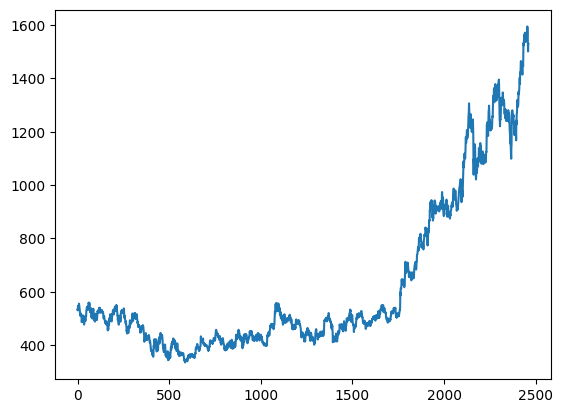

In [ ]:
plt.plot(df.Close)

In [ ]:
df

Open         High          Low        Close    Volume
0      540.427307   540.427307   506.127411   532.700500  35372156
1      569.551208   569.551208   527.697937   530.323059   9872785
2      534.879883   542.111328   530.298279   538.891846  10933743
3      538.891846   552.265076   533.938782   547.832092  12090336
4      548.797974   551.670715   542.854309   546.395691   6973331
...           ...          ...          ...          ...       ...
2456  1545.450684  1562.736816  1543.172241  1556.644531  11587233
2457  1554.168091  1557.288452  1528.015991  1531.928833   8329356
2458  1527.173950  1538.367798  1495.969727  1501.170410  13734705
2459  1512.661499  1531.681152  1507.015015  1527.867310   8158196
2460  1531.433594  1533.117554  1513.701660  1529.699951   7902607

[2461 rows x 5 columns]

taking moving average

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2456    1355.969764
2457    1359.089690
2458    1362.077369
2459    1365.360250
2460    1368.959136
Name: Close, Length: 2461, dtype: float64

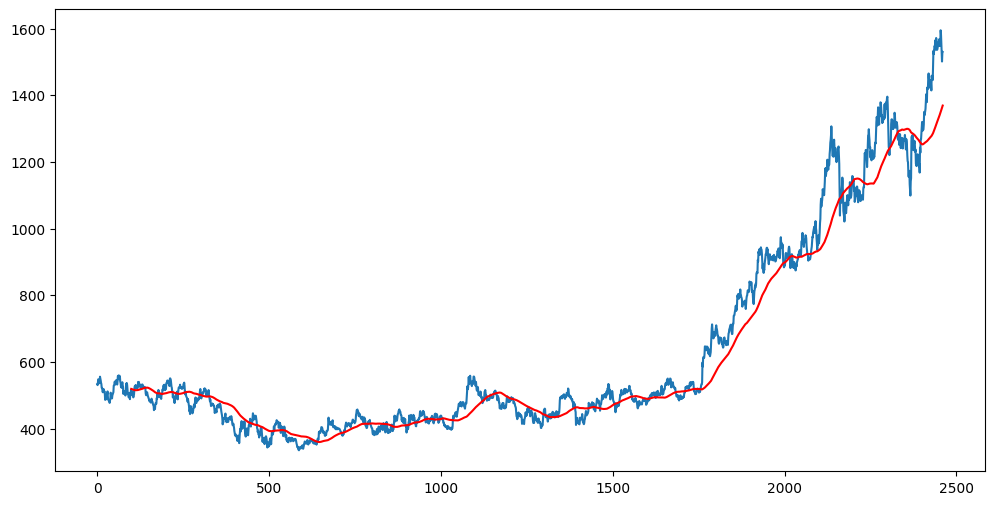

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2456    1327.605872
2457    1329.161873
2458    1330.623765
2459    1332.203045
2460    1333.754092
Name: Close, Length: 2461, dtype: float64

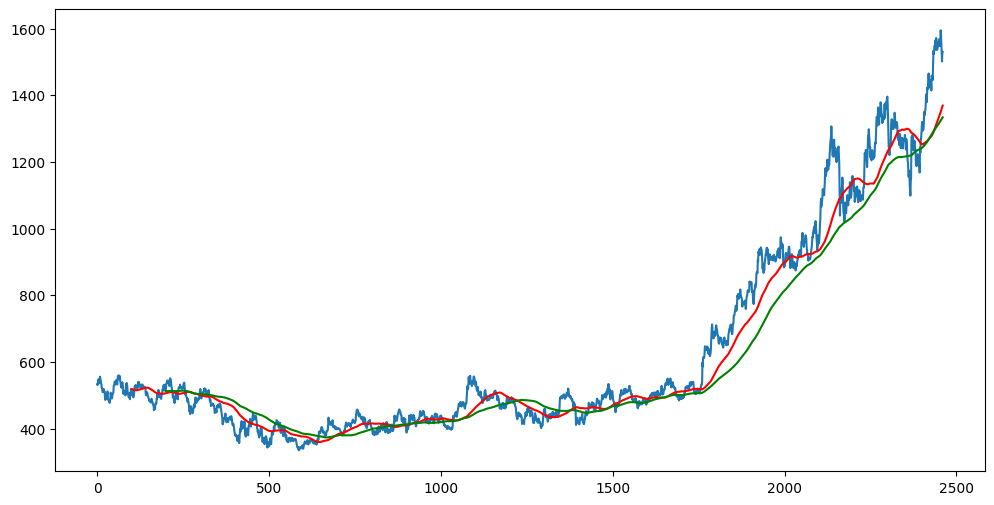

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(2461, 5)

In [ ]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)


(1722, 1)
(739, 1)


In [ ]:
data_training.head()

Close
0  532.700500
1  530.323059
2  538.891846
3  547.832092
4  546.395691

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape

(1722, 1)

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100:i])
    y_train.append(data_training_array[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)


In [ ]:
x_train.shape

(1622, 100, 1)

Ml model

In [ ]:
from keras.layers import Dense,Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
51/51 [==============================] - 26s 351ms/step - loss: 0.0621
Epoch 2/50
51/51 [==============================] - 20s 403ms/step - loss: 0.0207
Epoch 3/50
51/51 [==============================] - 18s 352ms/step - loss: 0.0181
Epoch 4/50
51/51 [==============================] - 18s 358ms/step - loss: 0.0154
Epoch 5/50
51/51 [==============================] - 19s 370ms/step - loss: 0.0139
Epoch 6/50
51/51 [==============================] - 18s 350ms/step - loss: 0.0131
Epoch 7/50
51/51 [==============================] - 19s 382ms/step - loss: 0.0128
Epoch 8/50
51/51 [==============================] - 18s 348ms/step - loss: 0.0115
Epoch 9/50
51/51 [==============================] - 18s 349ms/step - loss: 0.0106
Epoch 10/50
51/51 [==============================] - 19s 377ms/step - loss: 0.0115
Epoch 11/50
51/51 [==============================] - 18s 345ms/step - loss: 0.0106
Epoch 12/50
51/51 [==============================] - 18s 351ms/step - loss: 0.0101
Epoch 13/50
5

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

Close
1722  519.921692
1723  527.722717
1724  536.118164
1725  537.455444
1726  539.585266

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing,ignore_index=True)

<ipython-input-59-4d8ac21bc040>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
final_df.head()

Close
0  500.010406
1  501.644897
2  492.308411
3  491.837860
4  503.353699

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01416053],
       [0.01563232],
       [0.00722522],
       [0.00680151],
       [0.01717102],
       [0.02296903],
       [0.02361573],
       [0.01155141],
       [0.01621214],
       [0.02589034],
       [0.02102893],
       [0.01585532],
       [0.01797384],
       [0.01656894],
       [0.01520864],
       [0.01458421],
       [0.01906654],
       [0.01558772],
       [0.02236694],
       [0.03554623],
       [0.03953794],
       [0.03668356],
       [0.02294674],
       [0.01587763],
       [0.01879892],
       [0.01779544],
       [0.02481992],
       [0.02979285],
       [0.03066253],
       [0.02988205],
       [0.03891354],
       [0.04361884],
       [0.04667399],
       [0.04301676],
       [0.04214708],
       [0.04959525],
       [0.05577236],
       [0.05773475],
       [0.05920656],
       [0.05035347],
       [0.04223628],
       [0.04725375],
       [0.05037578],
       [0.05289567],
       [0.04979596],
       [0.05934039],
       [0.05853759],
       [0.052

In [ ]:
input_data.shape

(839, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100:i])
    y_test.append(input_data[i, 0])

x_test = np.array(x_test)
y_test = np.array(y_test)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(739, 100, 1)
(739,)


In [ ]:
# Making Predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 4s 155ms/step


In [ ]:
y_predicted.shape

(739, 1)

In [ ]:
y_test

array([0.03208977, 0.03911425, 0.04667399, 0.04787815, 0.04979596,
       0.03987247, 0.04444395, 0.04335124, 0.04457778, 0.04999667,
       0.04830189, 0.04707535, 0.05024196, 0.04393107, 0.02832103,
       0.02444084, 0.02495375, 0.02143032, 0.01701493, 0.02209935,
       0.01763933, 0.02111813, 0.02990436, 0.03008276, 0.03206746,
       0.02932454, 0.02493144, 0.02849943, 0.02370493, 0.02114044,
       0.02453004, 0.02337042, 0.02323662, 0.03213434, 0.03280337,
       0.04002856, 0.04359653, 0.04355196, 0.04926076, 0.10246863,
       0.09143013, 0.11647303, 0.11609392, 0.11451064, 0.11551415,
       0.12523692, 0.14610976, 0.14593136, 0.13979888, 0.13781418,
       0.13553957, 0.13904065, 0.14593136, 0.14267556, 0.14403587,
       0.13516046, 0.12757847, 0.12574986, 0.13181546, 0.13781418,
       0.12191423, 0.11952811, 0.12438955, 0.13063356, 0.15304505,
       0.1770176 , 0.1950137 , 0.20549475, 0.19126733, 0.18000581,
       0.17599178, 0.16780771, 0.17262447, 0.18468879, 0.17503

In [ ]:
y_predicted

array([[0.07097512],
       [0.07150385],
       [0.07191107],
       [0.07231513],
       [0.07279463],
       [0.07338962],
       [0.07400897],
       [0.07461077],
       [0.07515857],
       [0.07564124],
       [0.07610229],
       [0.07655433],
       [0.07698506],
       [0.07740662],
       [0.07776925],
       [0.07790515],
       [0.07769743],
       [0.07713015],
       [0.07622835],
       [0.07502829],
       [0.07364827],
       [0.0721712 ],
       [0.07070485],
       [0.0694105 ],
       [0.0683911 ],
       [0.06769989],
       [0.06730673],
       [0.06711525],
       [0.06707272],
       [0.06709389],
       [0.06709662],
       [0.06706659],
       [0.06699824],
       [0.06689489],
       [0.06684522],
       [0.06690994],
       [0.06717022],
       [0.0676772 ],
       [0.06841747],
       [0.06938496],
       [0.07113665],
       [0.07381795],
       [0.07790256],
       [0.08340476],
       [0.08978051],
       [0.0963086 ],
       [0.10271287],
       [0.109

In [ ]:
scaler.scale_

array([0.00090046])

In [ ]:
scale_factor = 1/0.00090046
y_predicted = y_predicted*scale_factor
y_test= y_test*scale_factor

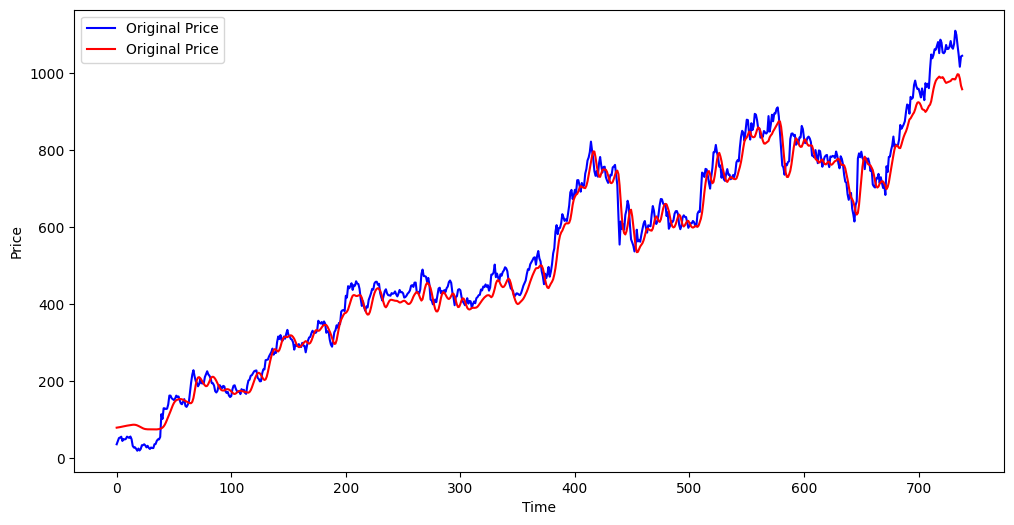

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
%run app.py

ModuleNotFoundError: ignored

<Figure size 640x480 with 0 Axes>